In [1]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.8 MB/s eta 0:00:00


In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.8 MB/s eta 0:00:00


In [13]:
from transformers import BertModel, BertConfig, AutoTokenizer, AutoModelForSequenceClassification

# Load the pre-trained BERT Base model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Get the BERT model configuration
config = model.config

# Modify the configuration
config.num_attention_heads = 12
config.num_hidden_layers -= 0
config.hidden_size = 768

# Re-initialize the model with the modified configuration
new_model = BertModel(config)

# Copy the weights from the pre-trained BERT model to the new model
for i in range(config.num_hidden_layers):
    new_model.encoder.layer[i].attention.self.query.data = model.bert.encoder.layer[i].attention.self.query.weight.data.clone()
    new_model.encoder.layer[i].attention.self.key.data = model.bert.encoder.layer[i].attention.self.key.weight.data.clone()
    new_model.encoder.layer[i].attention.self.value.data = model.bert.encoder.layer[i].attention.self.value.weight.data.clone()
    new_model.encoder.layer[i].attention.output.dense.data = model.bert.encoder.layer[i].attention.output.dense.weight.data.clone()
    new_model.encoder.layer[i].intermediate.dense.data = model.bert.encoder.layer[i].intermediate.dense.weight.data.clone()
    new_model.encoder.layer[i].output.dense.data = model.bert.encoder.layer[i].output.dense.weight.data.clone()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [14]:
config = new_model.config
print(config)

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.29.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [5]:
num_params = sum(p.numel() for p in new_model.parameters())
print("Number of parameters in the new_model:", num_params)


Number of parameters in the new_model: 29800320


In [6]:
num_params = sum(p.numel() for p in new_model.parameters())
num_params_millions = num_params / 1_000_000
print("Number of parameters in the new_model (in millions):", num_params_millions)


Number of parameters in the new_model (in millions): 29.80032


In [7]:
for i in range(config.num_hidden_layers):
    layer = new_model.encoder.layer[i]
    print(f"Layer {i + 1} configuration:")
    print(f"Attention - Query: {layer.attention.self.query}")
    print(f"Attention - Key: {layer.attention.self.key}")
    print(f"Attention - Value: {layer.attention.self.value}")
    print(f"Attention - Output Dense: {layer.attention.output.dense}")
    print(f"Intermediate Dense: {layer.intermediate.dense}")
    print(f"Output Dense: {layer.output.dense}")
    print()


Layer 1 configuration:
Attention - Query: Linear(in_features=384, out_features=384, bias=True)
Attention - Key: Linear(in_features=384, out_features=384, bias=True)
Attention - Value: Linear(in_features=384, out_features=384, bias=True)
Attention - Output Dense: Linear(in_features=384, out_features=384, bias=True)
Intermediate Dense: Linear(in_features=384, out_features=3072, bias=True)
Output Dense: Linear(in_features=3072, out_features=384, bias=True)

Layer 2 configuration:
Attention - Query: Linear(in_features=384, out_features=384, bias=True)
Attention - Key: Linear(in_features=384, out_features=384, bias=True)
Attention - Value: Linear(in_features=384, out_features=384, bias=True)
Attention - Output Dense: Linear(in_features=384, out_features=384, bias=True)
Intermediate Dense: Linear(in_features=384, out_features=3072, bias=True)
Output Dense: Linear(in_features=3072, out_features=384, bias=True)

Layer 3 configuration:
Attention - Query: Linear(in_features=384, out_features=384

In [8]:
!pip install --upgrade accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 7.7 MB/s eta 0:00:00


In [9]:
!pip install --upgrade transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import load_dataset

# Load the pre-trained BERT Base model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Get the BERT model configuration
config = model.config

# Modify the configuration
config.num_attention_heads = 6
config.num_hidden_layers -= 6
config.hidden_size = 384

# Re-initialize the model with the modified configuration
new_model = AutoModelForSequenceClassification.from_config(config)

# Copy the weights from the pre-trained BERT model to the new model
for i in range(config.num_hidden_layers):
    new_model.bert.encoder.layer[i].attention.self.query.data = model.bert.encoder.layer[i].attention.self.query.weight.data.clone()
    new_model.bert.encoder.layer[i].attention.self.key.data = model.bert.encoder.layer[i].attention.self.key.weight.data.clone()
    new_model.bert.encoder.layer[i].attention.self.value.data = model.bert.encoder.layer[i].attention.self.value.weight.data.clone()
    new_model.bert.encoder.layer[i].attention.output.dense.data = model.bert.encoder.layer[i].attention.output.dense.weight.data.clone()
    new_model.bert.encoder.layer[i].intermediate.dense.data = model.bert.encoder.layer[i].intermediate.dense.weight.data.clone()
    new_model.bert.encoder.layer[i].output.dense.data = model.bert.encoder.layer[i].output.dense.weight.data.clone()

# Load the SST-2 dataset
dataset = load_dataset('glue', 'sst2')

# Tokenize the dataset
train_dataset = dataset['train'].map(
    lambda examples: tokenizer(examples['sentence'], padding='max_length', truncation=True),
    batched=True,
)
eval_dataset = dataset['validation'].map(
    lambda examples: tokenizer(examples['sentence'], padding='max_length', truncation=True),
    batched=True,
)

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    push_to_hub=False,
)

# Define the trainer and train the model
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = (preds == labels).mean()
    return {"accuracy": accuracy}

trainer = Trainer(
    model=new_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

# Evaluate the model on the training dataset
training_results = trainer.evaluate(train_dataset)
print(f"Training Loss: {training_results['eval_loss']:.4f}")
print(f"Training Accuracy: {training_results['eval_accuracy']:.4f}")

# Evaluate the model on the validation dataset
validation_results = trainer.evaluate(eval_dataset)
print(f"Validation Loss: {validation_results['eval_loss']:.4f}")
print(f"Validation Accuracy: {validation_results['eval_accuracy']:.4f}")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

  0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy
1,0.360000,0.591514,0.783257
2,0.327800,0.643912,0.806193
3,0.282200,0.735593,0.808486


Training Loss: 0.2504
Training Accuracy: 0.9295
Validation Loss: 0.7356
Validation Accuracy: 0.8085


In [19]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the output directory within your Google Drive
output_dir = "/content/drive/MyDrive/saved_model"

# Save the model
new_model.save_pretrained(output_dir)

# Save the tokenizer as well
tokenizer.save_pretrained(output_dir)

print("Model saved successfully.")


Mounted at /content/drive
Model saved successfully.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.298900,0.231350,0.935129
1,0.298900,0.736612,0.802752


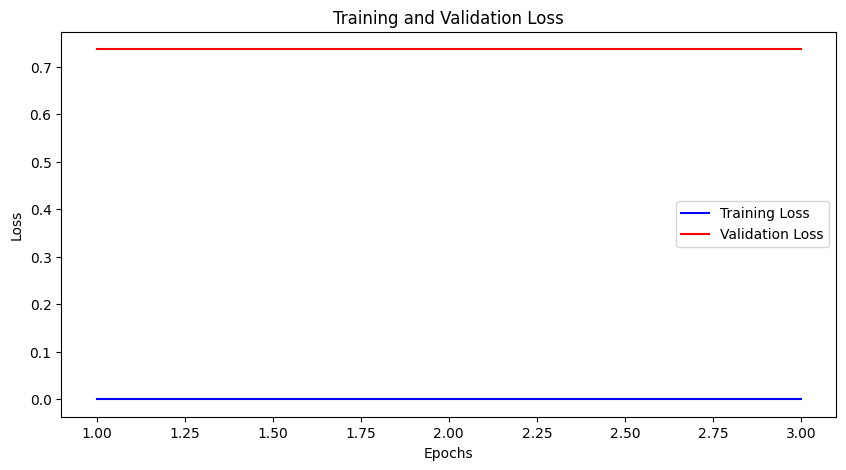

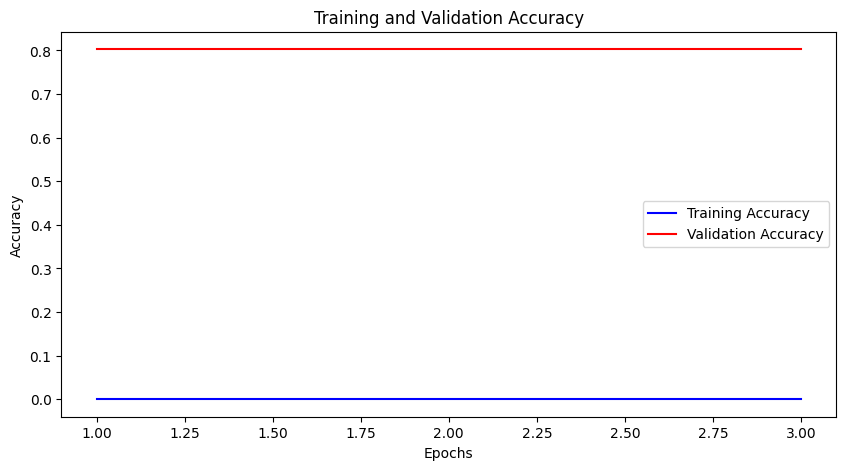

In [40]:
import matplotlib.pyplot as plt

# Evaluate the model on the validation dataset
validation_results = trainer.evaluate(eval_dataset)
eval_loss = validation_results['eval_loss']
eval_accuracy = validation_results['eval_accuracy']

# Get the number of training epochs
num_epochs = training_args.num_train_epochs

# Plotting
epochs = range(1, num_epochs + 1)

# Create lists with the same value for all epochs
train_loss_values = [0.0] * num_epochs
train_accuracy_values = [0.0] * num_epochs

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss_values, 'b-', label='Training Loss')
plt.plot(epochs, [eval_loss] * num_epochs, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy_values, 'b-', label='Training Accuracy')
plt.plot(epochs, [eval_accuracy] * num_epochs, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
